In [0]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [0]:
train_path="/content/drive/My Drive/ML/train.csv"
train = pd.read_csv(train_path, nrows = 3900000)

In [6]:
train.shape

(3900000, 8)

In [7]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [0]:
train['fare_amount']=pd.to_numeric(train['fare_amount'],errors='coerce')
train['pickup_longitude']=pd.to_numeric(train['pickup_longitude'],errors='coerce')
train['pickup_latitude']=pd.to_numeric(train['pickup_latitude'],errors='coerce')
train['dropoff_longitude']=pd.to_numeric(train['dropoff_longitude'],errors='coerce')
train['dropoff_latitude']=pd.to_numeric(train['dropoff_latitude'],errors='coerce')
train['passenger_count']=pd.to_numeric(train['passenger_count'],errors='coerce')

In [9]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
train.isnull().sum().sort_values(ascending=False)

dropoff_latitude     27
dropoff_longitude    27
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

In [0]:
train=train.dropna(axis=0,how='any')

In [12]:
train.shape

(3899973, 8)

In [13]:
train['fare_amount'].describe()

count    3.899973e+06
mean     1.133994e+01
std      9.796796e+00
min     -1.000000e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      6.981600e+02
Name: fare_amount, dtype: float64

In [14]:
train.shape

(3899973, 8)

In [15]:
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 3899807, True: 166})

In [16]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(3899807, 8)

In [17]:
train['passenger_count'].describe()

count    3.899807e+06
mean     1.684534e+00
std      1.338277e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [18]:
train = train.drop(train[train['passenger_count']>6].index, axis=0)
train.shape

(3899795, 8)

In [19]:
train['pickup_latitude'].describe()

count    3.899795e+06
mean     3.991843e+01
std      8.763044e+00
min     -3.488080e+03
25%      4.073490e+01
50%      4.075262e+01
75%      4.076710e+01
max      3.310364e+03
Name: pickup_latitude, dtype: float64

In [0]:
train = train.drop(((train[train['pickup_latitude']<40])).index, axis=0)

In [0]:
train = train.drop(((train[train['pickup_latitude']>42])).index, axis=0)

In [22]:
train.shape

(3822628, 8)

In [23]:
train['pickup_longitude'].describe()

count    3.822628e+06
mean    -7.397005e+01
std      2.897392e+00
min     -1.452988e+03
25%     -7.399228e+01
50%     -7.398210e+01
75%     -7.396833e+01
max      2.228739e+03
Name: pickup_longitude, dtype: float64

In [0]:
train = train.drop(((train[train['pickup_longitude']<-75])).index, axis=0)

In [0]:
train = train.drop(((train[train['pickup_longitude']>-72])).index, axis=0)

In [26]:
train.shape

(3821710, 8)

In [27]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [0]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [29]:
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [0]:
test_path="/content/drive/My Drive/ML/test.csv"
test = pd.read_csv(test_path)

In [31]:
test.shape

(11084772, 7)

In [32]:
test.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [0]:
test['key'] = pd.to_datetime(test['key'])

In [0]:
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [0]:
test['passenger_count']=pd.to_numeric(test['passenger_count'],errors='coerce')

In [36]:
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [0]:
def calc_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['Distance'] = d
    #return d

In [0]:
calc_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [39]:
train['Distance'].head(10)

0    2.102828
1    1.083702
2    6.028886
3    2.939171
4    1.136290
5    1.255119
6    3.562117
7    0.185836
8    8.197193
9    3.476334
Name: Distance, dtype: float64

In [40]:
train['Distance'].head(10)

0    2.102828
1    1.083702
2    6.028886
3    2.939171
4    1.136290
5    1.255119
6    3.562117
7    0.185836
8    8.197193
9    3.476334
Name: Distance, dtype: float64

In [41]:
train['Distance'].describe()

count    3.821710e+06
mean     1.140384e+01
std      2.590931e+02
min      0.000000e+00
25%      1.253526e+00
50%      2.154124e+00
75%      3.918284e+00
max      1.687830e+04
Name: Distance, dtype: float64

In [0]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [43]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Day of Week,Hour
0,2014-09-27 15:26:00.000000430,7.5,2014-09-27 15:26:00+00:00,-73.978463,40.759072,-73.963577,40.774255,1,2.102828,2014,9,27,5,15
1,2012-05-07 07:57:00.000000142,6.5,2012-05-07 07:57:00+00:00,-73.982397,40.770245,-73.972450,40.764062,1,1.083702,2012,5,7,0,7
2,2009-05-05 20:02:36.000000500,12.9,2009-05-05 20:02:36+00:00,-74.006507,40.718808,-73.961096,40.760711,1,6.028886,2009,5,5,1,20
3,2010-07-15 22:57:00.000000420,20.1,2010-07-15 22:57:00+00:00,-73.999242,40.734165,-73.972597,40.751228,2,2.939171,2010,7,15,3,22
4,2010-08-31 13:15:00.000000280,4.1,2010-08-31 13:15:00+00:00,-73.977750,40.746274,-73.972760,40.755768,1,1.136290,2010,8,31,1,13


In [44]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Day of Week,Hour
0,2009-01-01 00:01:04.000000300,2009-01-01 00:01:04+00:00,-73.972484,40.742743,-73.918937,40.764496,1,5.118060,2009,1,1,3,0
1,2009-01-01 00:01:26.000000100,2009-01-01 00:01:26+00:00,-73.985850,40.722826,-73.986301,40.739347,1,1.837444,2009,1,1,3,0
2,2009-01-01 00:04:42.000000100,2009-01-01 00:04:42+00:00,-73.988917,40.740142,-73.982769,40.777291,1,4.163110,2009,1,1,3,0
3,2009-01-01 00:04:54.000000100,2009-01-01 00:04:54+00:00,-73.977163,40.764490,-73.914474,40.771575,1,5.337783,2009,1,1,3,0
4,2009-01-01 00:04:59.000000400,2009-01-01 00:04:59+00:00,-73.948849,40.778003,-73.977678,40.748692,2,4.064204,2009,1,1,3,0


Text(0, 0.5, 'Frequency')

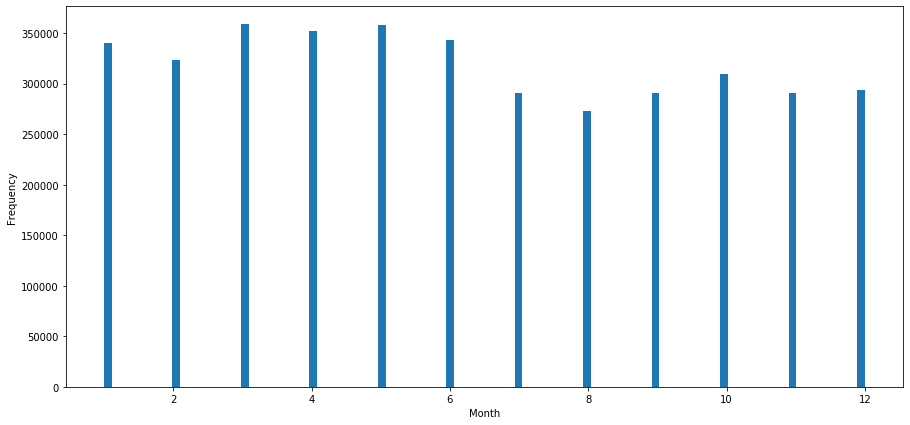

In [45]:
plt.figure(figsize=(15,7))
plt.hist(train['Month'], bins=100)
plt.xlabel('Month')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

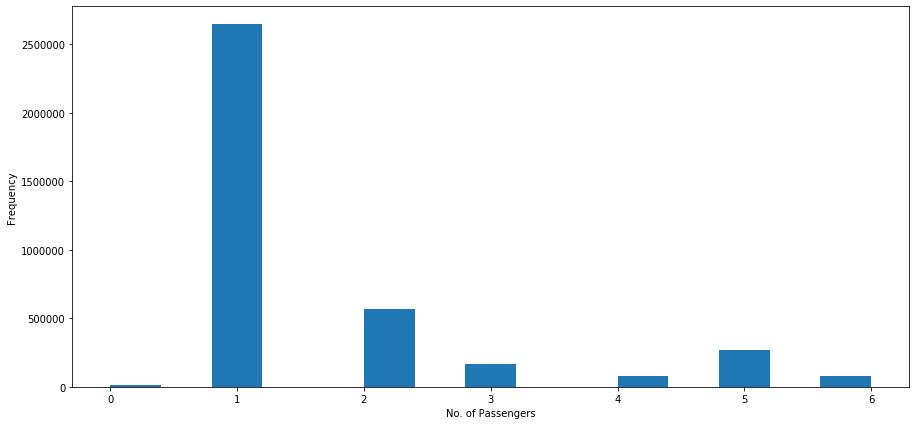

In [46]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

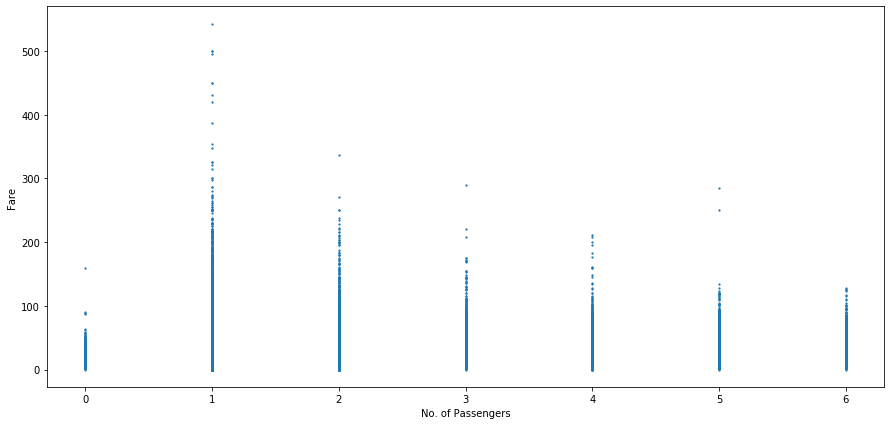

In [47]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

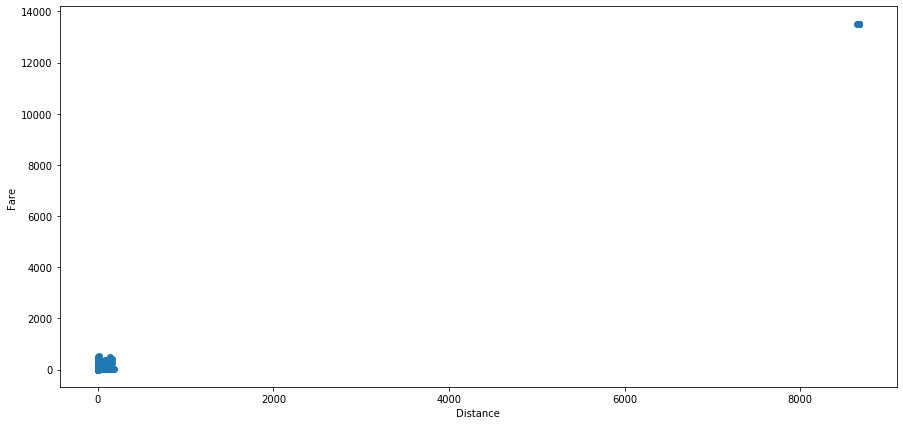

In [95]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Distance'], y=train['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

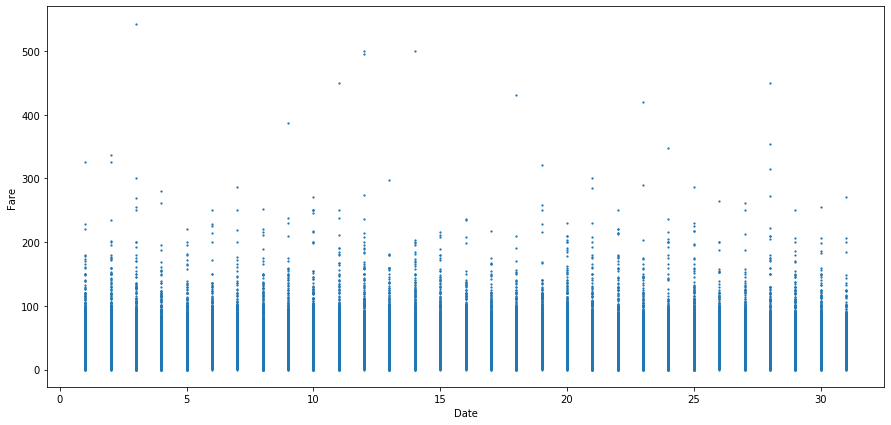

In [48]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

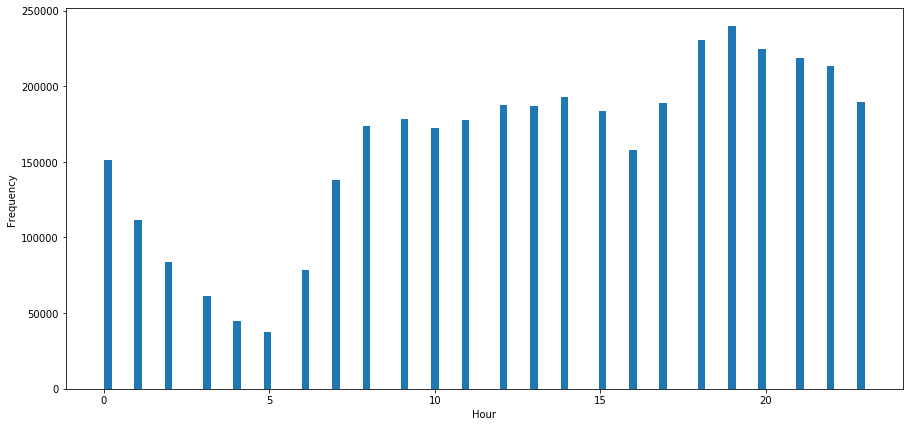

In [49]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

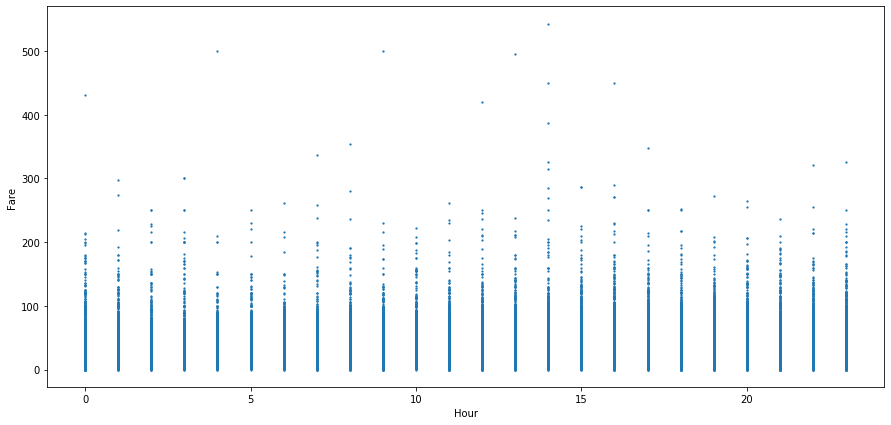

In [50]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

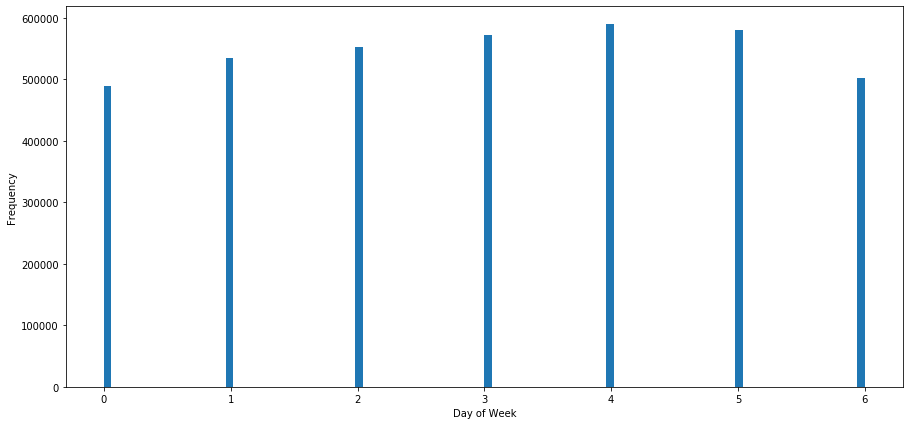

In [51]:
plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

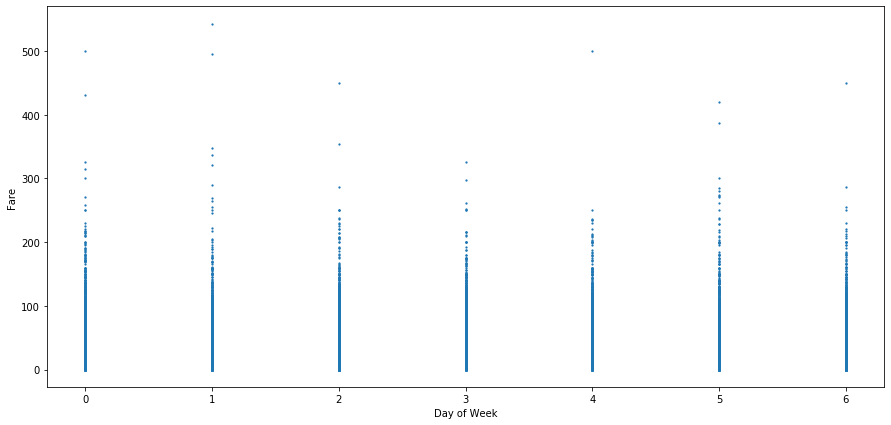

In [52]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

In [53]:
train.sort_values(['Distance','fare_amount'], ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Day of Week,Hour
2787565,2013-01-02 11:33:00.000000200,15.0,2013-01-02 11:33:00+00:00,-74.015200,40.709665,-40.719295,1651.553433,5,16878.303157,2013,1,2,2,11
2259897,2012-06-03 11:19:37.000000200,32.1,2012-06-03 11:19:37+00:00,-73.863359,40.769278,45.581619,-2.013462,2,12594.704725,2012,6,3,6,11
2131525,2012-09-18 17:13:00.000000153,9.5,2012-09-18 17:13:00+00:00,-73.979395,40.752990,-2125.745368,0.000000,1,11532.176571,2012,9,18,1,17
558552,2012-05-24 09:00:00.000000101,17.7,2012-05-24 09:00:00+00:00,-73.997572,40.720945,-1329.621332,40.773717,1,10942.515639,2012,5,24,3,9
139610,2012-09-13 07:34:00.000000101,12.5,2012-09-13 07:34:00+00:00,-73.970357,40.757368,-0.068333,3210.337087,1,10906.196104,2012,9,13,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295535,2010-02-10 20:18:01.000000200,0.0,2010-02-10 20:18:01+00:00,-74.003095,40.743403,-74.003095,40.743403,1,0.000000,2010,2,10,2,20
2478979,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03+00:00,-73.994125,40.741131,-73.994125,40.741131,1,0.000000,2015,5,27,2,23
2532364,2015-02-19 09:43:11.000000700,0.0,2015-02-19 09:43:11+00:00,-73.953857,40.813251,-73.953857,40.813251,1,0.000000,2015,2,19,3,9
2585642,2010-02-03 11:44:07.000000200,0.0,2010-02-03 11:44:07+00:00,-74.014147,40.710546,-74.014147,40.710546,1,0.000000,2010,2,3,2,11


In [54]:
len(train)

3821710

In [55]:
bins_0 = train.loc[(train['Distance'] == 0), ['Distance']]
bins_1 = train.loc[(train['Distance'] > 0) & (train['Distance'] <= 10),['Distance']]
bins_2 = train.loc[(train['Distance'] > 10) & (train['Distance'] <= 50),['Distance']]
bins_3 = train.loc[(train['Distance'] > 50) & (train['Distance'] <= 100),['Distance']]

bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3])
dist_bins.columns

Index(['Distance', 'bins'], dtype='object')

Text(0, 0.5, 'Frequency')

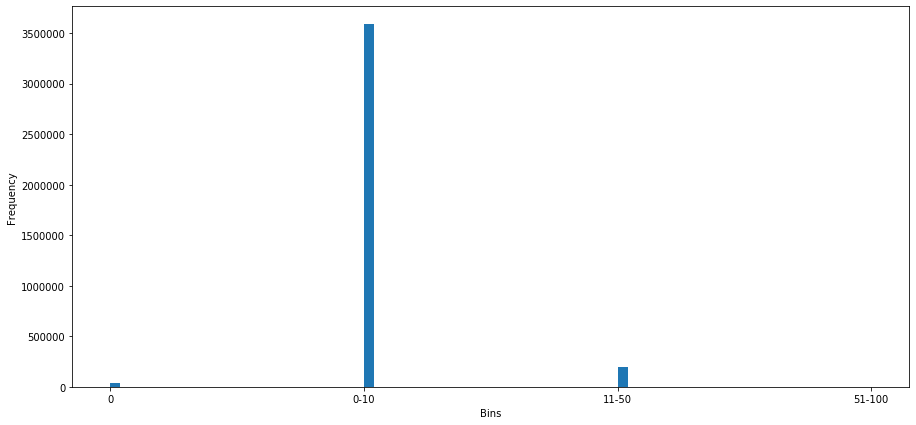

In [91]:
plt.figure(figsize=(15,7))
plt.hist(dist_bins['bins'], bins=75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [56]:
Counter(dist_bins['bins'])

Counter({'0': 40526, '0-10': 3585006, '11-50': 191269, '51-100': 602})

In [57]:
#pickup latitude and longitude = 0
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Day of Week,Hour


In [0]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [59]:
train.shape

(3821710, 14)

In [60]:
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Day of Week,Hour
71,2009-01-01 00:29:51.000000700,2009-01-01 00:29:51+00:00,0.0,0.0,-74.017672,40.717668,1,8668.134588,2009,1,1,3,0
1655,2009-01-01 15:09:00.000000139,2009-01-01 15:09:00+00:00,0.0,0.0,-73.965030,40.755433,1,8664.547831,2009,1,1,3,15
3652,2009-01-02 06:49:00.000000580,2009-01-02 06:49:00+00:00,0.0,0.0,-73.973252,40.760880,3,8665.340143,2009,1,2,4,6
4781,2009-01-02 14:15:00.000000172,2009-01-02 14:15:00+00:00,0.0,0.0,-73.965092,40.755162,5,8664.547407,2009,1,2,4,14
7569,2009-01-03 02:56:28.000000200,2009-01-03 02:56:28+00:00,0.0,0.0,-73.992067,40.749962,4,8666.674194,2009,1,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081627,2015-06-30 07:45:23.000000700,2015-06-30 07:45:23+00:00,0.0,0.0,-73.970345,40.761570,1,8665.113609,2015,6,30,1,7
11081992,2015-06-30 09:39:15.000000500,2015-06-30 09:39:15+00:00,0.0,0.0,-73.968040,40.792850,1,8665.564452,2015,6,30,1,9
11082992,2015-06-30 15:01:31.000000100,2015-06-30 15:01:31+00:00,0.0,0.0,-73.983955,40.737778,1,8665.753087,2015,6,30,1,15
11083472,2015-06-30 17:48:26.000000100,2015-06-30 17:48:26+00:00,0.0,0.0,-73.988312,40.720364,1,8665.757480,2015,6,30,1,17


In [61]:
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Day of Week,Hour
390287,2013-08-18 00:21:42.000000200,0.0,2013-08-18 00:21:42+00:00,-73.988647,40.731393,0.0,0.0,1,8666.010941,2013,8,18,6,0
637348,2015-05-04 00:52:14.000000200,0.0,2015-05-04 00:52:14+00:00,-73.887604,40.716785,0.0,0.0,1,8657.342504,2015,5,4,0,0
917514,2015-06-09 20:31:04.000000600,0.0,2015-06-09 20:31:04+00:00,-73.967117,40.766876,0.0,0.0,1,8664.955274,2015,6,9,1,20
1175434,2015-05-30 03:23:01.000000200,0.0,2015-05-30 03:23:01+00:00,-74.002304,40.708973,0.0,0.0,1,8666.683730,2015,5,30,5,3
1245100,2015-06-08 05:19:21.000000200,0.0,2015-06-08 05:19:21+00:00,-73.984421,40.728683,0.0,0.0,1,8665.605456,2015,6,8,0,5
1248891,2015-06-23 22:39:47.000000300,0.0,2015-06-23 22:39:47+00:00,-73.973373,40.747875,0.0,0.0,1,8665.083672,2015,6,23,1,22
1368168,2013-08-25 01:47:26.000000200,0.0,2013-08-25 01:47:26+00:00,-73.996752,40.763577,0.0,0.0,2,8667.340731,2013,8,25,6,1
1854169,2013-08-06 23:11:41.000000400,0.0,2013-08-06 23:11:41+00:00,-73.993769,40.720913,0.0,0.0,1,8666.220774,2013,8,6,1,23
2060955,2015-03-22 00:36:37.000000900,0.0,2015-03-22 00:36:37+00:00,-73.952240,40.749435,0.0,0.0,1,8663.365938,2015,3,22,6,0
2577110,2015-03-25 01:14:37.000000100,0.0,2015-03-25 01:14:37+00:00,-73.937645,40.758244,0.0,0.0,1,8662.338538,2015,3,25,2,1


In [62]:
#Checking test data
test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Day of Week,Hour
21696,2009-01-06 18:48:00.000000173,2009-01-06 18:48:00+00:00,-73.937302,40.758152,0.0,0.0,1,8662.308268,2009,1,6,1,18
46820,2009-01-12 10:24:52.000000200,2009-01-12 10:24:52+00:00,-73.968538,40.762048,0.0,0.0,1,8664.973867,2009,1,12,0,10
55187,2009-01-14 09:05:52.000000400,2009-01-14 09:05:52+00:00,-73.991930,40.764665,0.0,0.0,1,8666.963838,2009,1,14,2,9
81782,2009-01-19 21:34:00.000000690,2009-01-19 21:34:00+00:00,-73.978960,40.742527,0.0,0.0,1,8665.436681,2009,1,19,0,21
87555,2009-01-21 10:22:48.000000300,2009-01-21 10:22:48+00:00,-73.974730,40.757546,0.0,0.0,1,8665.394165,2009,1,21,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082574,2015-06-30 12:47:23.000000300,2015-06-30 12:47:23+00:00,-73.986809,40.750427,0.0,0.0,5,8666.248352,2015,6,30,1,12
11082760,2015-06-30 13:48:44.000000800,2015-06-30 13:48:44+00:00,-73.776817,40.645145,0.0,0.0,2,8646.683701,2015,6,30,1,13
11082879,2015-06-30 14:27:26.000000200,2015-06-30 14:27:26+00:00,-73.991066,40.737301,0.0,0.0,1,8666.332179,2015,6,30,1,14
11082995,2015-06-30 15:02:04.000000500,2015-06-30 15:02:04+00:00,-73.979195,40.777660,0.0,0.0,1,8666.175953,2015,6,30,1,15


In [0]:
high_distance = train.loc[(train['Distance']>200)&(train['fare_amount']!=0)]

In [64]:
high_distance.shape

(3834, 14)

In [65]:
high_distance['Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
train.update(high_distance)

In [67]:
train.shape

(3821710, 14)

In [68]:
train[(train['Distance']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Day of Week,Hour
207727,2015-01-16 14:56:36.000000400,0.0,2015-01-16 14:56:36+00:00,-73.937531,40.758289,-73.937531,40.758289,1.0,0.0,2015.0,1.0,16.0,4.0,14.0
472885,2010-02-22 01:02:16.000000200,0.0,2010-02-22 01:02:16+00:00,-73.981984,40.757467,-73.981984,40.757467,1.0,0.0,2010.0,2.0,22.0,0.0,1.0
1040189,2010-02-13 00:30:23.000000100,0.0,2010-02-13 00:30:23+00:00,-73.968945,40.764540,-73.968945,40.764540,1.0,0.0,2010.0,2.0,13.0,5.0,0.0
1459775,2010-03-13 02:39:29.000000100,0.0,2010-03-13 02:39:29+00:00,-74.035278,40.738683,-74.035278,40.738683,2.0,0.0,2010.0,3.0,13.0,5.0,2.0
1481722,2015-05-07 19:12:43.000000500,0.0,2015-05-07 19:12:43+00:00,-73.913727,40.779018,-73.913727,40.779018,1.0,0.0,2015.0,5.0,7.0,3.0,19.0
1554095,2010-03-29 12:47:22.000000500,0.0,2010-03-29 12:47:22+00:00,-73.836776,40.869879,-73.836776,40.869879,1.0,0.0,2010.0,3.0,29.0,0.0,12.0
1626033,2015-01-14 10:15:51.000000200,0.0,2015-01-14 10:15:51+00:00,-73.937508,40.758129,-73.937508,40.758129,1.0,0.0,2015.0,1.0,14.0,2.0,10.0
2012298,2015-01-25 20:54:02.000000400,0.0,2015-01-25 20:54:02+00:00,-73.981293,40.769012,-73.981293,40.769012,1.0,0.0,2015.0,1.0,25.0,6.0,20.0
2269294,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54+00:00,-73.982354,40.679971,-73.982354,40.679971,1.0,0.0,2013.0,8.0,5.0,0.0,6.0
2295535,2010-02-10 20:18:01.000000200,0.0,2010-02-10 20:18:01+00:00,-74.003095,40.743403,-74.003095,40.743403,1.0,0.0,2010.0,2.0,10.0,2.0,20.0


In [0]:
train = train.drop(train[(train['Distance']==0)&(train['fare_amount']==0)].index, axis = 0)

In [70]:
train[(train['Distance']==0)].shape

(41135, 14)

In [0]:
#Between 6AM and 8PM on Mon-Fri
rush_hour = train.loc[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['Distance']==0) & (train['fare_amount'] < 2.5))]

In [0]:
train=train.drop(rush_hour.index, axis=0)

In [73]:
train.shape

(3821693, 14)

In [0]:
non_rush_hour = train.loc[(((train['Hour']<6)|(train['Hour']>20)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5)) & (train['Distance']==0) & (train['fare_amount'] < 3.0))]

In [0]:
weekends = train.loc[((train['Day of Week']==0) | (train['Day of Week']==6)) & (train['Distance']==0) & (train['fare_amount'] < 3.0)]

In [76]:
train.loc[(train['Distance']!=0) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Day of Week,Hour
7149,2010-02-10 16:43:02.000000200,0.0,2010-02-10 16:43:02+00:00,-73.978861,40.759465,-73.975811,40.758107,4.0,0.297984,2010.0,2.0,10.0,2.0,16.0
8793,2015-06-25 21:15:59.000000700,0.0,2015-06-25 21:15:59+00:00,-74.120827,40.939167,-74.121971,40.939655,1.0,0.110400,2015.0,6.0,25.0,3.0,21.0
156161,2013-08-13 09:07:00.000000149,0.0,2013-08-13 09:07:00+00:00,-73.902000,40.764082,-73.902012,40.764082,1.0,0.001011,2013.0,8.0,13.0,1.0,9.0
258659,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38+00:00,-73.999496,40.748787,-74.002556,40.744659,1.0,0.526370,2015.0,5.0,8.0,4.0,7.0
357012,2015-02-04 23:47:28.000000600,0.0,2015-02-04 23:47:28+00:00,-73.864532,40.770012,-74.030937,40.727139,1.0,14.806275,2015.0,2.0,4.0,2.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605484,2010-03-29 09:48:15.000000300,0.0,2010-03-29 09:48:15+00:00,-73.935574,40.737711,-73.982365,40.748256,1.0,4.112661,2010.0,3.0,29.0,0.0,9.0
3647165,2015-03-01 17:48:51.000000500,0.0,2015-03-01 17:48:51+00:00,-73.998901,40.761848,-73.998940,40.761765,2.0,0.009869,2015.0,3.0,1.0,6.0,17.0
3701159,2013-08-21 09:59:00.000000133,0.0,2013-08-21 09:59:00+00:00,-73.937467,40.758262,-73.937477,40.758280,1.0,0.002172,2013.0,8.0,21.0,2.0,9.0
3727214,2013-08-21 16:04:30.000000100,0.0,2013-08-21 16:04:30+00:00,-73.974925,40.748838,-73.976375,40.751810,1.0,0.352321,2013.0,8.0,21.0,2.0,16.0


In [77]:
scenario_3 = train.loc[(train['Distance']!=0) & (train['fare_amount']==0)]
len(scenario_3)

86

In [78]:
scenario_3.sort_values('Distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Day of Week,Hour
1368168,2013-08-25 01:47:26.000000200,0.0,2013-08-25 01:47:26+00:00,-73.996752,40.763577,0.000000,0.000000,2.0,8667.340731,2013.0,8.0,25.0,6.0,1.0
3515968,2015-04-28 11:18:39.000000400,0.0,2015-04-28 11:18:39+00:00,-73.996246,40.748653,0.000000,0.000000,1.0,8666.993460,2015.0,4.0,28.0,1.0,11.0
1175434,2015-05-30 03:23:01.000000200,0.0,2015-05-30 03:23:01+00:00,-74.002304,40.708973,0.000000,0.000000,1.0,8666.683730,2015.0,5.0,30.0,5.0,3.0
1854169,2013-08-06 23:11:41.000000400,0.0,2013-08-06 23:11:41+00:00,-73.993769,40.720913,0.000000,0.000000,1.0,8666.220774,2013.0,8.0,6.0,1.0,23.0
390287,2013-08-18 00:21:42.000000200,0.0,2013-08-18 00:21:42+00:00,-73.988647,40.731393,0.000000,0.000000,1.0,8666.010941,2013.0,8.0,18.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194700,2013-08-03 18:51:26.000000400,0.0,2013-08-03 18:51:26+00:00,-74.163165,40.547880,-74.163173,40.547882,1.0,0.000712,2013.0,8.0,3.0,5.0,18.0
2585574,2010-03-08 18:22:00.000000760,0.0,2010-03-08 18:22:00+00:00,-73.937353,40.758227,-73.937358,40.758230,1.0,0.000537,2010.0,3.0,8.0,0.0,18.0
2257640,2015-05-31 04:40:53.000000100,0.0,2015-05-31 04:40:53+00:00,-73.896584,40.752499,-73.896584,40.752502,1.0,0.000424,2015.0,5.0,31.0,6.0,4.0
2900207,2015-02-22 19:26:37.000000500,0.0,2015-02-22 19:26:37+00:00,-73.994370,40.750725,-73.994370,40.750721,1.0,0.000424,2015.0,2.0,22.0,6.0,19.0


In [79]:
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['Distance'] * 1.56) + 2.50), axis=1
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
scenario_3['fare_amount']

7149        2.964855
8793        2.672225
156161      2.501577
258659      3.321137
357012     25.597788
             ...    
3605484     8.915751
3647165     2.515396
3701159     2.503388
3727214     3.049621
3852042     2.875957
Name: fare_amount, Length: 86, dtype: float64

In [0]:
train.update(scenario_3)

In [82]:
train.shape

(3821693, 14)

In [83]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'Distance', 'Year', 'Month', 'Date', 'Day of Week',
       'Hour'],
      dtype='object')

In [84]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Distance',
       'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [0]:
train = train.drop(['key','pickup_datetime'], axis = 1)

In [0]:
test = test.drop(['pickup_datetime'], axis = 1)

In [87]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Distance',
       'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [88]:
test.columns

Index(['key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [0]:
train.to_csv('train_new.csv', index=False)

In [0]:
test.to_csv('test_new.csv', index=False)